# HEART DISEASE DIAGNOSTIC ANALYSIS

Importing all necessary Libraries:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import ydata_profiling
import warnings
warnings.filterwarnings("ignore")


Loading dataset by using pandas:

In [2]:
df=pd.read_csv("heart.csv")
print(df.to_string())

      age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  caa  thall  output
0    63.0  1.0   3   145.0   233  1.0      0.0       150     0      2.3  0.0  0.0    1.0     1.0
1    37.0  1.0   2   130.0   250  0.0      1.0       187     0      3.5  0.0  0.0    2.0     1.0
2    41.0  0.0   1   130.0   204  0.0      0.0       172     0      1.4  2.0  0.0    2.0     1.0
3     NaN  1.0   1   120.0   236  0.0      1.0       178     0      0.8  2.0  0.0    2.0     1.0
4    57.0  0.0   0   120.0   354  0.0      1.0       163     1      0.6  2.0  0.0    2.0     1.0
5    57.0  1.0   0   140.0   192  0.0      1.0       148     0      0.4  1.0  0.0    1.0     1.0
6    56.0  0.0   1     NaN   294  0.0      0.0       153     0      1.3  1.0  0.0    2.0     1.0
7    44.0  1.0   1   120.0   263  0.0      1.0       173     0      0.0  2.0  0.0    3.0     1.0
8    52.0  1.0   2   172.0   199  1.0      1.0       162     0      0.5  2.0  0.0    3.0     1.0
9    57.0  1.0   2   150.0   1

In [3]:
df.head()

age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0  63.0  1.0   3   145.0   233  1.0      0.0       150     0      2.3  0.0   
1  37.0  1.0   2   130.0   250  0.0      1.0       187     0      3.5  0.0   
2  41.0  0.0   1   130.0   204  0.0      0.0       172     0      1.4  2.0   
3   NaN  1.0   1   120.0   236  0.0      1.0       178     0      0.8  2.0   
4  57.0  0.0   0   120.0   354  0.0      1.0       163     1      0.6  2.0   

   caa  thall  output  
0  0.0    1.0     1.0  
1  0.0    2.0     1.0  
2  0.0    2.0     1.0  
3  0.0    2.0     1.0  
4  0.0    2.0     1.0

In [4]:
df.shape

(303, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       300 non-null    float64
 1   sex       302 non-null    float64
 2   cp        303 non-null    int64  
 3   trtbps    295 non-null    float64
 4   chol      303 non-null    int64  
 5   fbs       299 non-null    float64
 6   restecg   297 non-null    float64
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   300 non-null    float64
 10  slp       302 non-null    float64
 11  caa       301 non-null    float64
 12  thall     301 non-null    float64
 13  output    302 non-null    float64
dtypes: float64(10), int64(4)
memory usage: 33.3 KB


In [6]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [7]:
df.isnull().sum()

age         3
sex         1
cp          0
trtbps      8
chol        0
fbs         4
restecg     6
thalachh    0
exng        0
oldpeak     3
slp         1
caa         2
thall       2
output      1
dtype: int64

In [8]:
df1=df.copy()

In [9]:
df.fillna(method="ffill",inplace=True)


In [10]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [11]:
df.duplicated().sum()

1

In [12]:
df.drop_duplicates(inplace=True)

In [13]:
df.duplicated().sum()

0

In [14]:
df.describe()

age         sex          cp      trtbps        chol         fbs  \
count  302.000000  302.000000  302.000000  302.000000  302.000000  302.000000   
mean    54.307947    0.685430    0.963576  131.847682  246.500000    0.152318   
std      9.058753    0.465115    1.032044   17.458541   51.753489    0.359925   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.250000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.500000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.750000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg    thalachh        exng     oldpeak         slp         caa  \
count  302.000000  302.000000  302.000000  302.000000  302.000000  302.000000   
mean     0.526490  149.569536    0.327815    1.040066    1.394040    0.728477   
std      0.526027   22.903527    0.470196    1.163174    0.615711    1.007835   
min      0.000000   71.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000  133.250000    0.000000    0.000000    1.000000    0.000000   
50%      1.000000  152.500000    0.000000    0.800000    1.000000    0.000000   
75%      1.000000  166.000000    1.000000    1.600000    2.000000    1.000000   
max      2.000000  202.000000    1.000000    6.200000    2.000000    4.000000   

            thall      output  
count  302.000000  302.000000  
mean     2.311258    0.543046  
std      0.612011    0.498970  
min      0.000000    0.000000  
25%      2.000000    0.000000  
50%      2.000000    1.000000  
75%      3.000000    1.000000  
max      3.000000    1.000000

In [15]:
df["output"].value_counts()

1.0    164
0.0    138
Name: output, dtype: int64

In [16]:
#converting numerical data into categorical data
def heart_disease(row):
    if row==0:
        return "Absence" # it indicates that the person has not have  heart disease
    elif row==1:
        return "Presence" # it indicates that the person has heart disease

In [17]:
#adding converted data into our dataset with new column-Heart_disease
df["Heart_Disease"]=df["output"].apply(heart_disease)
df.head()

age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0  63.0  1.0   3   145.0   233  1.0      0.0       150     0      2.3  0.0   
1  37.0  1.0   2   130.0   250  0.0      1.0       187     0      3.5  0.0   
2  41.0  0.0   1   130.0   204  0.0      0.0       172     0      1.4  2.0   
3  41.0  1.0   1   120.0   236  0.0      1.0       178     0      0.8  2.0   
4  57.0  0.0   0   120.0   354  0.0      1.0       163     1      0.6  2.0   

   caa  thall  output Heart_Disease  
0  0.0    1.0     1.0      Presence  
1  0.0    2.0     1.0      Presence  
2  0.0    2.0     1.0      Presence  
3  0.0    2.0     1.0      Presence  
4  0.0    2.0     1.0      Presence

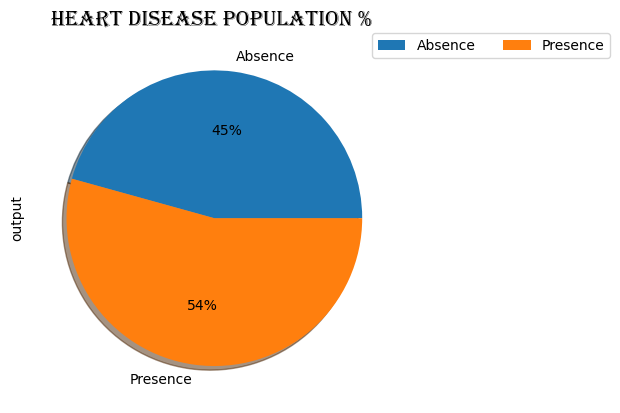

In [18]:
df.groupby("Heart_Disease")['output'].count().plot(kind="pie",autopct='%1.1i%%',shadow=True)
font1={"family":"Algerian","color":"k","size":16}
plt.title("Heart Disease Population % ",fontdict=font1)
plt.legend(ncol=2,loc='upper right',bbox_to_anchor=(1.59,1.02))
plt.show()

# The pie plot tells that presence has more percentage than absence of heart diseases.

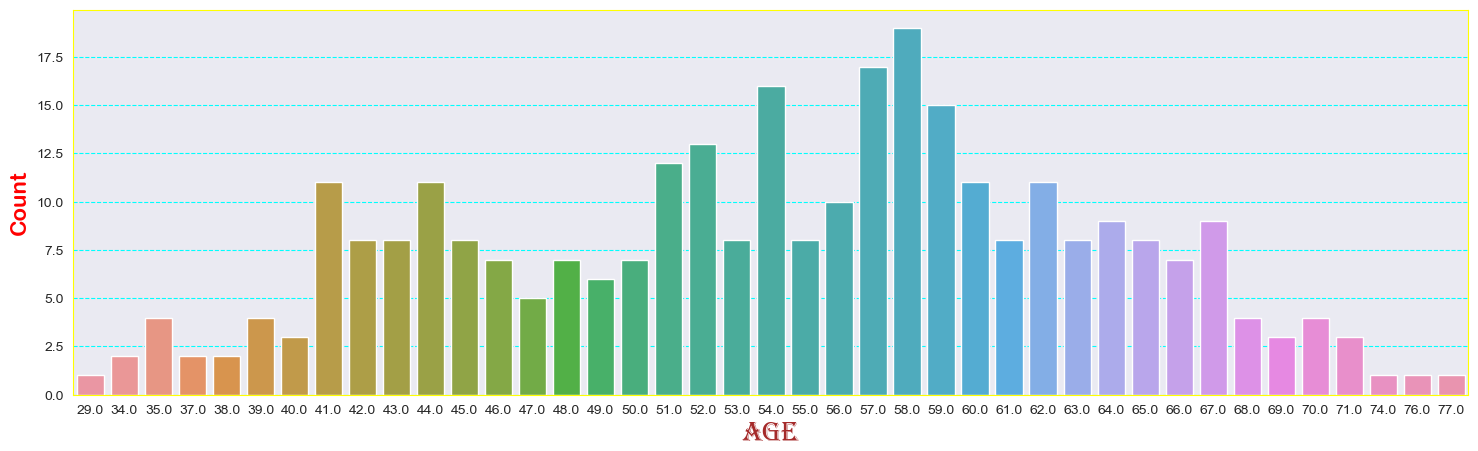

In [29]:
sns.axes_style()
plt.figure(figsize=[18,5])
font1={"family":"Algerian","color":"brown","size":20}
font2={"family":"Arial Rounded MT Bold","color":"r","size":16}
sns.countplot(x='age',data=df)
custome={"axes.edgecolor":"yellow","grid.linestyle":"--",'grid.color':"cyan"}
sns.set_style("darkgrid",rc=custome)
plt.xlabel("AGE",fontdict=font1)
plt.ylabel("Count",fontdict=font2)
plt.show()


# We Can Observe that the count of population according to their age,eg:Young age,Middle age,Elder people

In [20]:
#statistical analysis 
Min_age=df["age"].min()
Max_age=df["age"].max()
Mean_age=df["age"].mean()
print("minimum age =",Min_age)
print("maximum age =",Max_age)
print("Mean age =",Mean_age)

minimum age = 29.0
maximum age = 77.0
Mean age = 54.30794701986755


In [21]:
#categorical analysis
Young_age=df[(df["age"]>=29)&(df["age"]<40)]
Middle_age=df[(df["age"]>=40)&(df["age"]<55)]
Elder_age=df[(df["age"]>=55)]
print("Young Age =",len(Young_age))
print("Middle Age =",len(Middle_age))
print("Elder Age =",len(Elder_age))

Young Age = 15
Middle Age = 130
Elder Age = 157


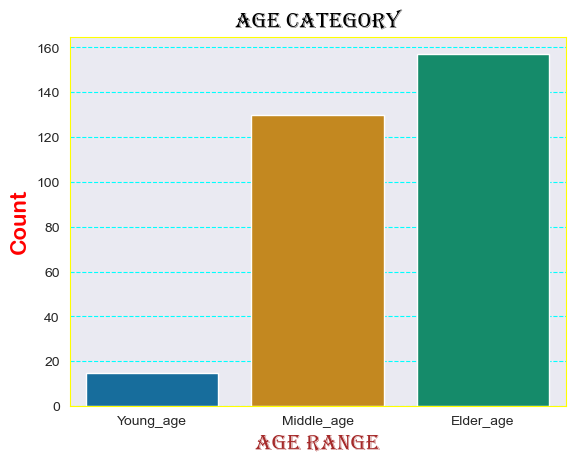

In [30]:
font1={"family":"Algerian","color":"brown","size":16}
font2={"family":"Arial Rounded MT Bold","color":"r","size":16}
font3={"family":"Algerian","color":"k","size":16}
sns.barplot(x=["Young_age","Middle_age","Elder_age"],y=[len(Young_age),len(Middle_age),len(Elder_age)],palette='colorblind')
plt.xlabel("Age Range",fontdict=font1)
plt.ylabel("Count",fontdict=font2)
plt.title("Age Category",fontdict=font3)
plt.show()

# From the above plot, I observed that elder age population is more than the middle age and young age population.And there is a least population of Young age.

In [23]:
#converting numerical data into categorical data
def gender(row):
    if row==1:
        return "Male"
    elif row==0:
        return "Female"

In [24]:
# adding converted data into our dataset with new column-Gender
df["Gender"]=df["sex"].apply(gender)
df.head()

age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0  63.0  1.0   3   145.0   233  1.0      0.0       150     0      2.3  0.0   
1  37.0  1.0   2   130.0   250  0.0      1.0       187     0      3.5  0.0   
2  41.0  0.0   1   130.0   204  0.0      0.0       172     0      1.4  2.0   
3  41.0  1.0   1   120.0   236  0.0      1.0       178     0      0.8  2.0   
4  57.0  0.0   0   120.0   354  0.0      1.0       163     1      0.6  2.0   

   caa  thall  output Heart_Disease  Gender  
0  0.0    1.0     1.0      Presence    Male  
1  0.0    2.0     1.0      Presence    Male  
2  0.0    2.0     1.0      Presence  Female  
3  0.0    2.0     1.0      Presence    Male  
4  0.0    2.0     1.0      Presence  Female

In [25]:
#converting numerical data into categorical data 
def age_range(row):
    if row>=29 and row<40:
        return "Young Age"
    elif row>=40 and row<55:
        return "Middle Age"
    elif row>=55:
        return "Elder Age"

In [26]:
#adding converting data into our dataset with new column-Age_range
df["Age_range"]=df["age"].apply(age_range)
df.head()

age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0  63.0  1.0   3   145.0   233  1.0      0.0       150     0      2.3  0.0   
1  37.0  1.0   2   130.0   250  0.0      1.0       187     0      3.5  0.0   
2  41.0  0.0   1   130.0   204  0.0      0.0       172     0      1.4  2.0   
3  41.0  1.0   1   120.0   236  0.0      1.0       178     0      0.8  2.0   
4  57.0  0.0   0   120.0   354  0.0      1.0       163     1      0.6  2.0   

   caa  thall  output Heart_Disease  Gender   Age_range  
0  0.0    1.0     1.0      Presence    Male   Elder Age  
1  0.0    2.0     1.0      Presence    Male   Young Age  
2  0.0    2.0     1.0      Presence  Female  Middle Age  
3  0.0    2.0     1.0      Presence    Male  Middle Age  
4  0.0    2.0     1.0      Presence  Female   Elder Age

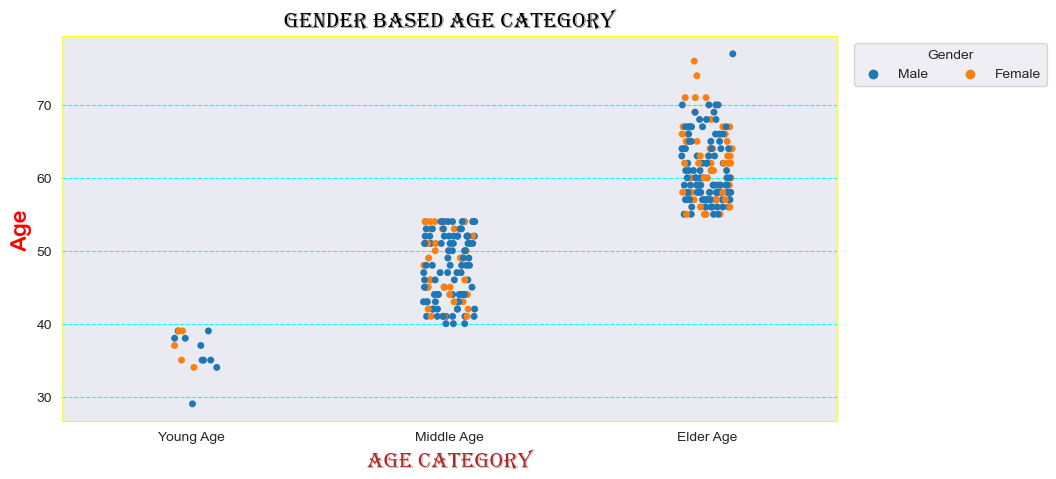

In [31]:
plt.figure(figsize=[10,5])
font1={"family":"Algerian","color":"brown","size":16}
font2={"family":"Arial Rounded MT Bold","color":"r","size":16}
font3={"family":"Algerian","color":"k","size":16}
sns.stripplot(x="Age_range",y="age",data=df,hue="Gender",order=["Young Age","Middle Age","Elder Age"])
plt.xlabel("Age Category",fontdict=font1)
plt.ylabel("Age",fontdict=font2)
plt.title("Gender Based Age Category",fontdict=font3)
plt.legend(title="Gender",ncol=2,loc='upper right',bbox_to_anchor=(1.28,1))
plt.show()

# In the given dataset the number of male Population is more than the female population in each group.

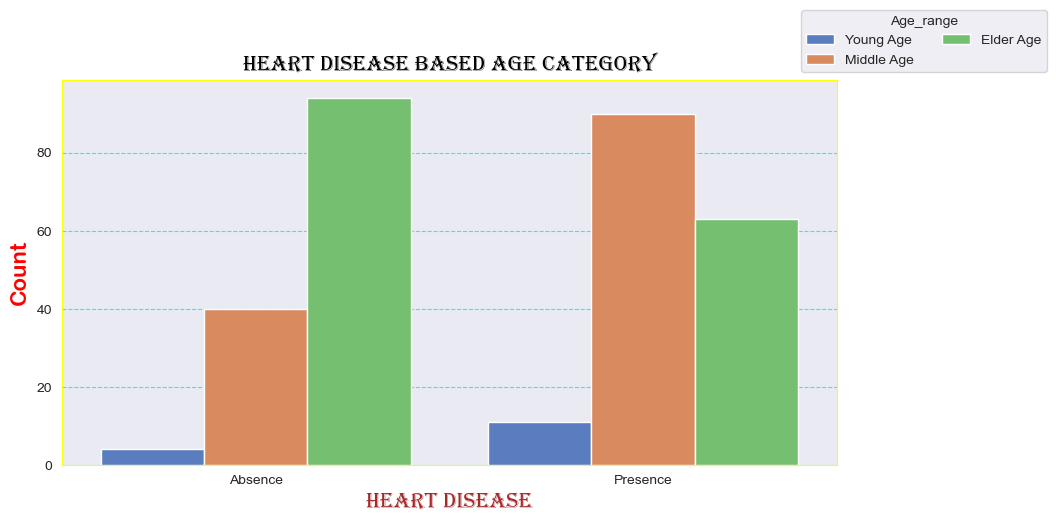

In [32]:
plt.figure(figsize=[10,5])
font1={"family":"Algerian","color":"brown","size":16}
font2={"family":"Arial Rounded MT Bold","color":"r","size":16}
font3={"family":"Algerian","color":"k","size":16}
hue_orders=["Young Age","Middle Age","Elder Age"]
sns.countplot(x="Heart_Disease",hue="Age_range",data=df,hue_order=hue_orders,order=["Absence","Presence"],palette="muted")
plt.xlabel("Heart Disease",fontdict=font1)
plt.ylabel("Count",fontdict=font2)
plt.title("Heart disease Based Age Category",fontdict=font3)
plt.legend(title="Age_range",ncol=2,loc='upper right',bbox_to_anchor=(1.28,1.20))
plt.show()

# Middle Age people are more effected by heart disease and young age people are rarely effected

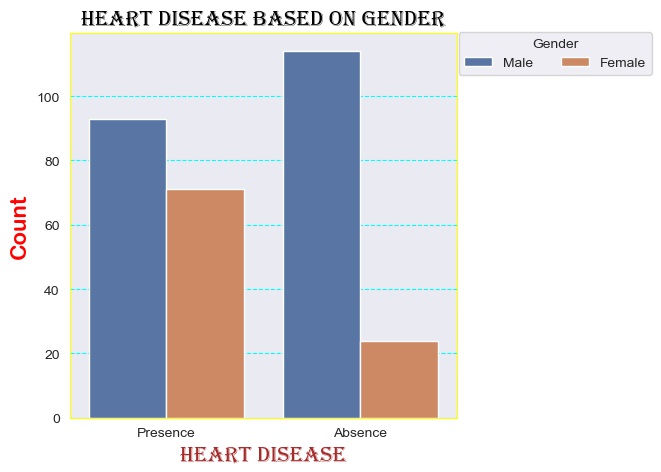

In [33]:
plt.figure(figsize=[5,5])
font1={"family":"Algerian","color":"brown","size":16}
font2={"family":"Arial Rounded MT Bold","color":"r","size":16}
font3={"family":"Algerian","color":"k","size":16}
sns.countplot(x="Heart_Disease",hue="Gender",data=df,palette="deep")
plt.xlabel("Heart Disease",fontdict=font1)
plt.ylabel("Count",fontdict=font2)
plt.title("Heart disease Based on gender",fontdict=font3)
plt.legend(title="Gender",ncol=2,loc='upper right',bbox_to_anchor=(1.52,1.02))
plt.show()

# From the above Graph,It is observed that there are more number of males are effected by heart diseases compare to females

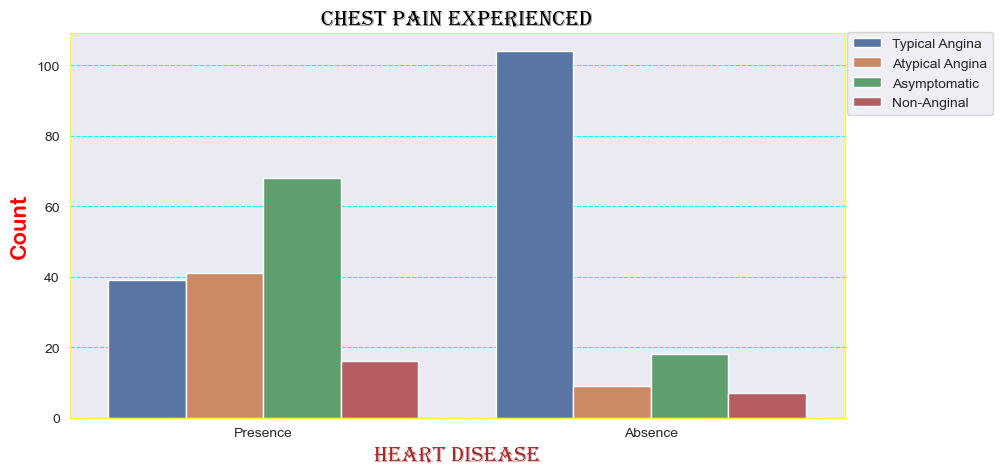

In [288]:
plt.figure(figsize=[10,5])
font1={"family":"Algerian","color":"brown","size":16}
font2={"family":"Arial Rounded MT Bold","color":"r","size":16}
font3={"family":"Algerian","color":"k","size":16}
sns.countplot(x="Heart_Disease",hue="cp",data=df,palette="deep")
plt.xlabel("Heart Disease",fontdict=font1)
plt.ylabel("Count",fontdict=font2)
plt.title("Chest Pain Experienced",fontdict=font3)
plt.legend(labels=["Typical Angina","Atypical Angina","Asymptomatic","Non-Anginal"],bbox_to_anchor=(1.20,1.02))
plt.show()

# It is observed that people having asymptomatic chest pain have higher chance of heart diseases.

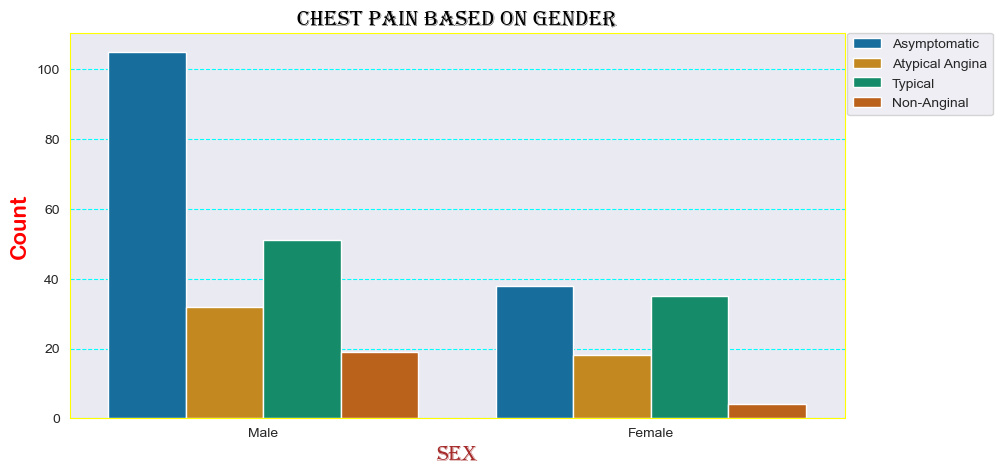

In [294]:
plt.figure(figsize=[10,5])
font1={"family":"Algerian","color":"brown","size":16}
font2={"family":"Arial Rounded MT Bold","color":"r","size":16}
font3={"family":"Algerian","color":"k","size":16}
sns.countplot(x="Gender",hue="cp",data=df,palette="colorblind")
plt.xlabel("Sex",fontdict=font1)
plt.ylabel("Count",fontdict=font2)
plt.title("Chest Pain Based On Gender",fontdict=font3)
plt.legend(labels=["Asymptomatic","Atypical Angina","Typical","Non-Anginal"],bbox_to_anchor=(1.20,1.02))
plt.show()

# It is observed that higher number of males are suffering from asymptomatic chest pain.

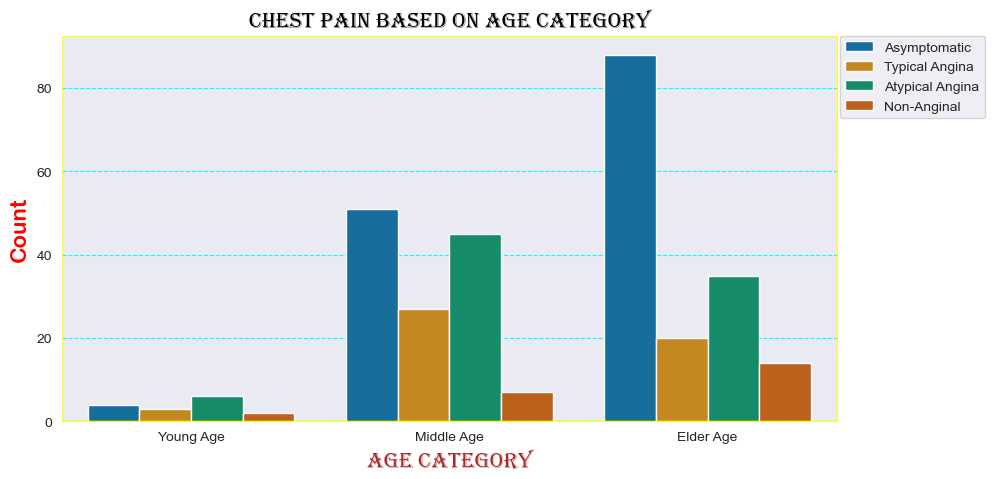

In [291]:
plt.figure(figsize=[10,5])
font1={"family":"Algerian","color":"brown","size":16}
font2={"family":"Arial Rounded MT Bold","color":"r","size":16}
font3={"family":"Algerian","color":"k","size":16}
sns.countplot(x="Age_range",hue="cp",data=df,order=["Young Age","Middle Age","Elder Age"],palette="colorblind")
plt.xlabel("Age Category",fontdict=font1)
plt.ylabel("Count",fontdict=font2)
plt.title("Chest Pain Based On Age Category",fontdict=font3)
plt.legend(labels=["Asymptomatic","Typical Angina","Atypical Angina","Non-Anginal"],bbox_to_anchor=(1.20,1.02))
plt.show()

# It seems that elder age group have very high asymptomatic chest pain.

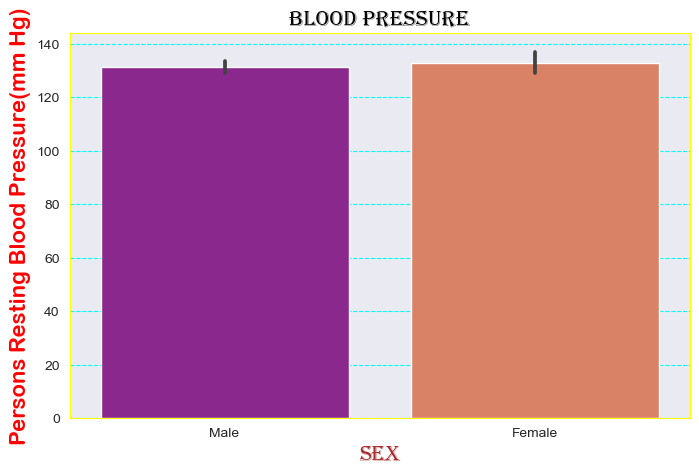

In [262]:
plt.figure(figsize=[8,5])
font1={"family":"Algerian","color":"brown","size":16}
font2={"family":"Arial Rounded MT Bold","color":"r","size":16}
font3={"family":"Algerian","color":"k","size":16}
sns.barplot(x="Gender",y="trtbps",data=df,palette="plasma")
plt.xlabel("Sex",fontdict=font1)
plt.ylabel("Persons Resting Blood Pressure(mm Hg)",fontdict=font2)
plt.title("Blood Pressure",fontdict=font3)
plt.show()

# It is observed that Person's Resting Blood Pressure is almost same for males and females.

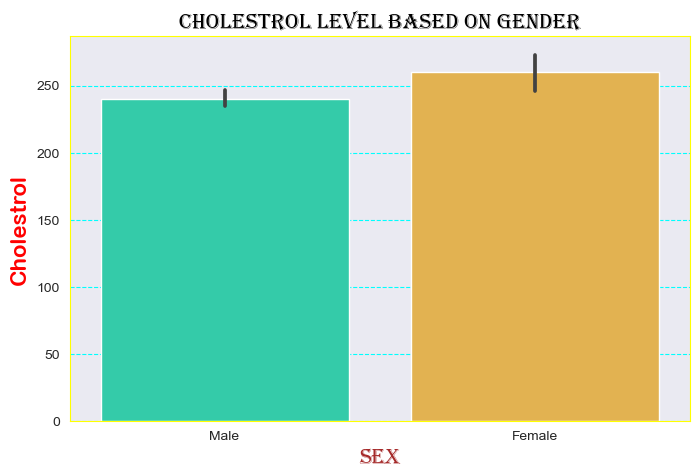

In [263]:
plt.figure(figsize=[8,5])
font1={"family":"Algerian","color":"brown","size":16}
font2={"family":"Arial Rounded MT Bold","color":"r","size":16}
font3={"family":"Algerian","color":"k","size":16}
sns.barplot(x="Gender",y="chol",data=df,palette="turbo")
plt.xlabel("Sex",fontdict=font1)
plt.ylabel("Cholestrol",fontdict=font2)
plt.title("Cholestrol level Based On Gender",fontdict=font3)
plt.show()

# It is observed   that the cholestrol level is little bit more in females than males

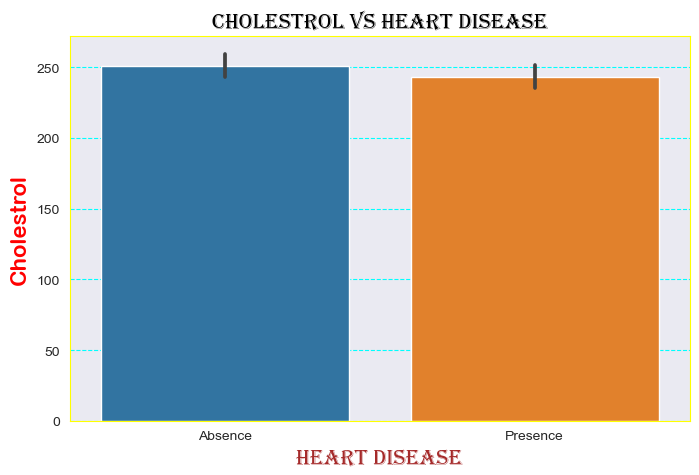

In [295]:
plt.figure(figsize=[8,5])
font1={"family":"Algerian","color":"brown","size":16}
font2={"family":"Arial Rounded MT Bold","color":"r","size":16}
font3={"family":"Algerian","color":"k","size":16}
sns.barplot(x="Heart_Disease",y="chol",data=df,order=["Absence","Presence"])
plt.xlabel("Heart Disease",fontdict=font1)
plt.ylabel("Cholestrol",fontdict=font2)
plt.title("Cholestrol vs Heart Disease",fontdict=font3)
plt.show()

# people who doesn't have cholestrol are also effected by heart disease.

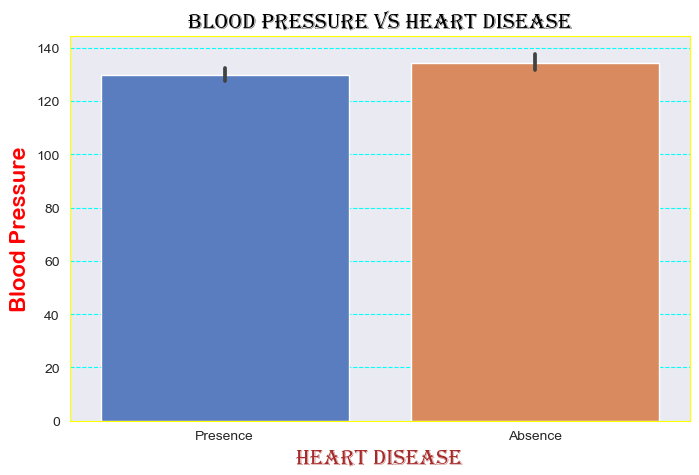

In [265]:
plt.figure(figsize=[8,5])
font1={"family":"Algerian","color":"brown","size":16}
font2={"family":"Arial Rounded MT Bold","color":"r","size":16}
font3={"family":"Algerian","color":"k","size":16}
sns.barplot(x="Heart_Disease",y="trtbps",data=df,palette="muted")
plt.xlabel("Heart Disease",fontdict=font1)
plt.ylabel("Blood Pressure",fontdict=font2)
plt.title("Blood Pressure vs Heart Disease",fontdict=font3)
plt.show()

# people who doesn't have any Heart disease have more Blood Pressure compare to the people having heart disease.

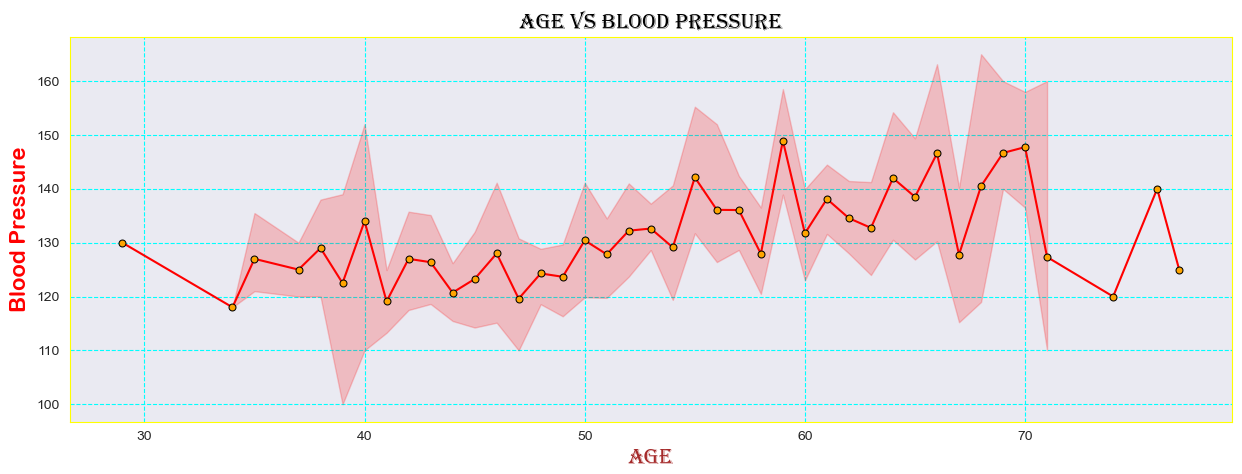

In [266]:
plt.figure(figsize=[15,5])
font1={"family":"Algerian","color":"brown","size":16}
font2={"family":"Arial Rounded MT Bold","color":"r","size":16}
font3={"family":"Algerian","color":"k","size":16}
sns.lineplot(x="age",y="trtbps",data=df,color="r",marker="o",ms=5,mec="k",mfc="orange",ls="-")
plt.xlabel("AGE",fontdict=font1)
plt.ylabel("Blood Pressure",fontdict=font2)
plt.title("Age vs Blood Pressure",fontdict=font3)
plt.show()

# Here I observed that the blood pressure is normal from age 30 to 50 and after 50 it increases gradually to age of 60.And after age of 60 it is fluctuating drastically.

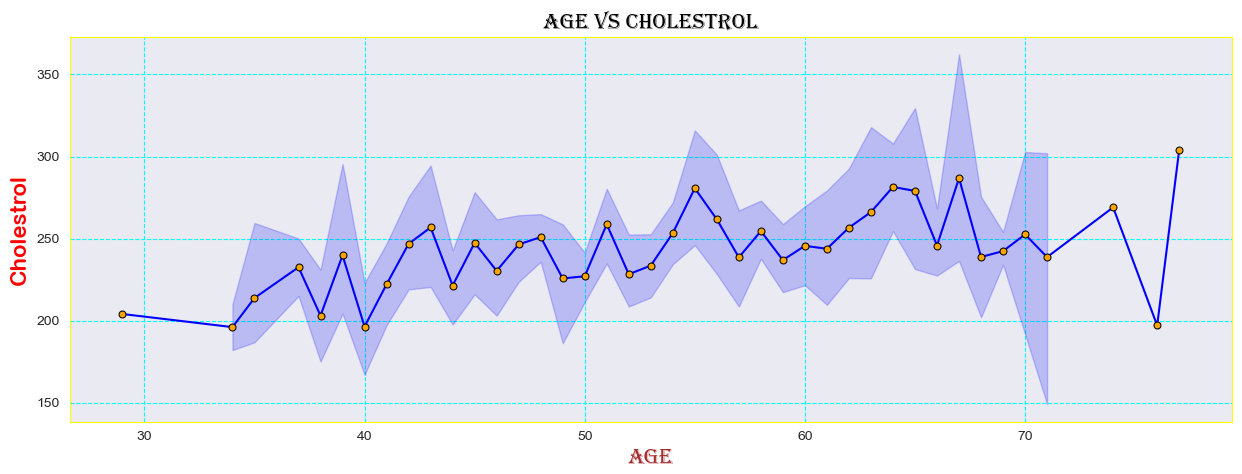

In [267]:
plt.figure(figsize=[15,5])
font1={"family":"Algerian","color":"brown","size":16}
font2={"family":"Arial Rounded MT Bold","color":"r","size":16}
font3={"family":"Algerian","color":"k","size":16}
sns.lineplot(x="age",y="chol",data=df,color="b",marker="o",ms=5,mec="k",mfc="orange",ls="-")
plt.xlabel("AGE",fontdict=font1)
plt.ylabel("Cholestrol",fontdict=font2)
plt.title("Age vs cholestrol",fontdict=font3)
plt.show()

# cholestrol level is start increasing at the age of 50.

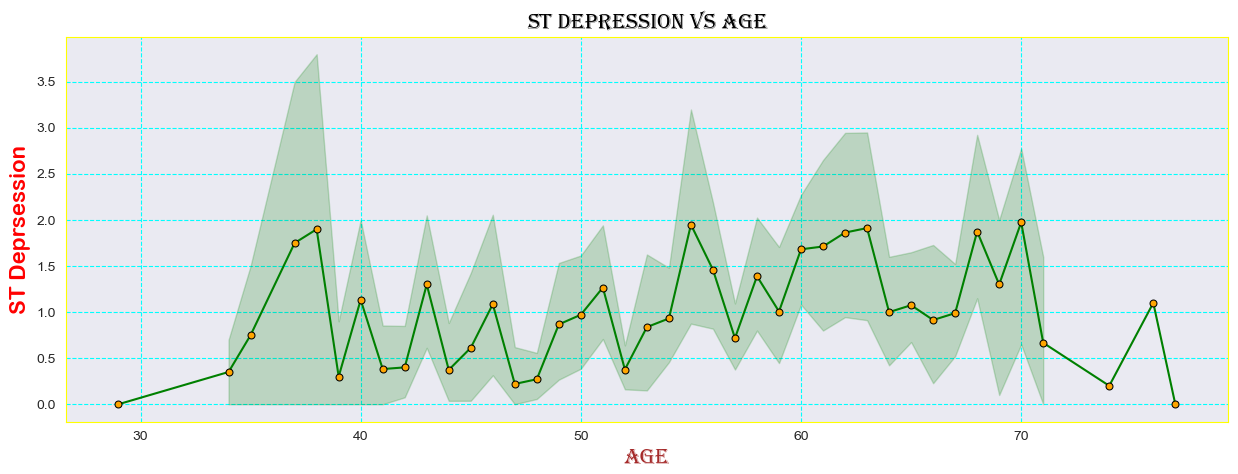

In [268]:
plt.figure(figsize=[15,5])
font1={"family":"Algerian","color":"brown","size":16}
font2={"family":"Arial Rounded MT Bold","color":"r","size":16}
font3={"family":"Algerian","color":"k","size":16}
sns.lineplot(x="age",y="oldpeak",data=df,color="g",marker="o",ms=5,mec="k",mfc="orange",ls="-")
plt.xlabel("AGE",fontdict=font1)
plt.ylabel("ST Deprsession",fontdict=font2)
plt.title("ST Depression vs Age",fontdict=font3)
plt.show()

# Depression level is quite high in the age group of 30 to 40 and 55 to 70.And in the age group of 40 to 55,it remains stable.

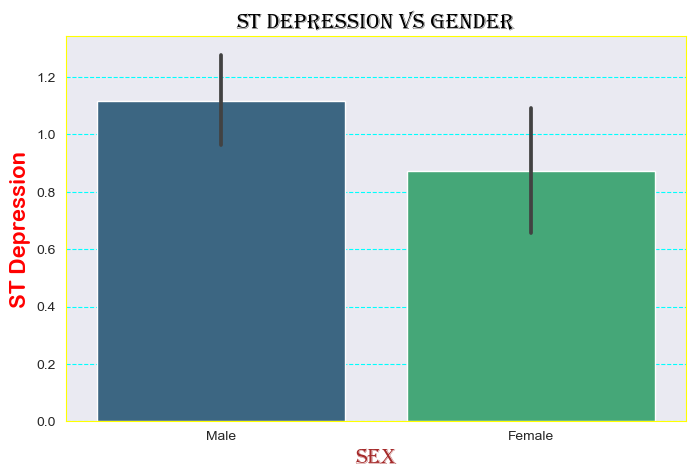

In [300]:
plt.figure(figsize=[8,5])
font1={"family":"Algerian","color":"brown","size":16}
font2={"family":"Arial Rounded MT Bold","color":"r","size":16}
font3={"family":"Algerian","color":"k","size":16}
sns.barplot(x="Gender",y="oldpeak",data=df,palette="viridis")
plt.xlabel("Sex",fontdict=font1)
plt.ylabel("ST Depression",fontdict=font2)
plt.title("ST Depression vs Gender",fontdict=font3)
plt.show()


# It is observed that the  Males are getting more depressed than females.

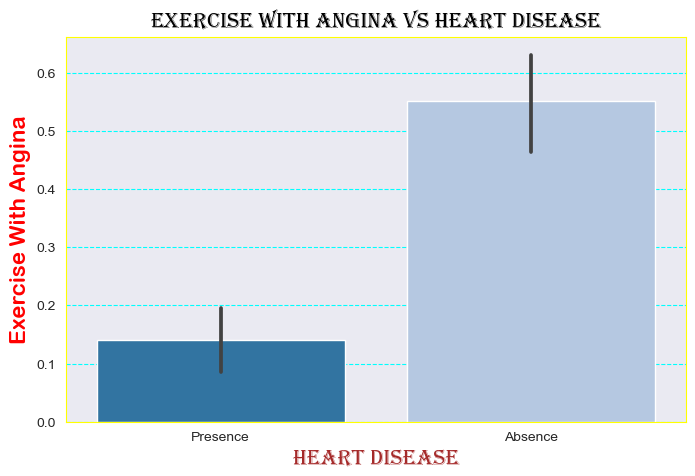

In [270]:
plt.figure(figsize=[8,5])
font1={"family":"Algerian","color":"brown","size":16}
font2={"family":"Arial Rounded MT Bold","color":"r","size":16}
font3={"family":"Algerian","color":"k","size":16}
sns.barplot(x="Heart_Disease",y="exng",data=df,palette="tab20")
plt.xlabel("Heart Disease",fontdict=font1)
plt.ylabel("Exercise With Angina",fontdict=font2)
plt.title("Exercise With Angina vs Heart Disease",fontdict=font3)
plt.show()

# It is observed that if the people who suffered with angina,whether he/her do exercise or not,can also have heart diseases.

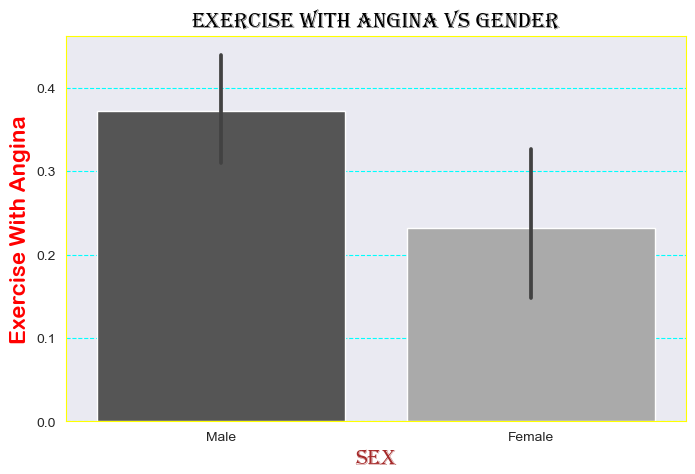

In [271]:
plt.figure(figsize=[8,5])
font1={"family":"Algerian","color":"brown","size":16}
font2={"family":"Arial Rounded MT Bold","color":"r","size":16}
font3={"family":"Algerian","color":"k","size":16}
sns.barplot(x="Gender",y="exng",data=df,palette="binary_r")
plt.xlabel("Sex",fontdict=font1)
plt.ylabel("Exercise With Angina",fontdict=font2)
plt.title("Exercise With Angina vs Gender",fontdict=font3)
plt.show()

# Male category having high exercise induced Angina. 

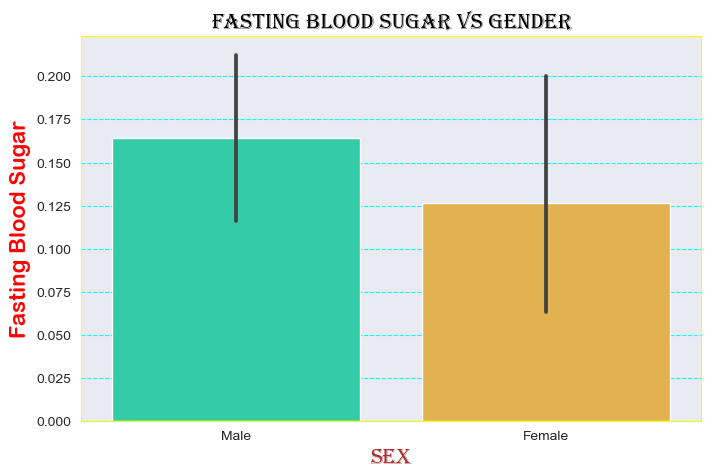

In [272]:
plt.figure(figsize=[8,5])
font1={"family":"Algerian","color":"brown","size":16}
font2={"family":"Arial Rounded MT Bold","color":"r","size":16}
font3={"family":"Algerian","color":"k","size":16}
sns.barplot(x="Gender",y="fbs",data=df,palette="turbo")
plt.xlabel("Sex",fontdict=font1)
plt.ylabel("Fasting Blood Sugar",fontdict=font2)
plt.title("Fasting Blood Sugar vs Gender",fontdict=font3)
plt.show()

# It is Observed that males having high fasting blood pressure > 120mg/dl

<Axes: >

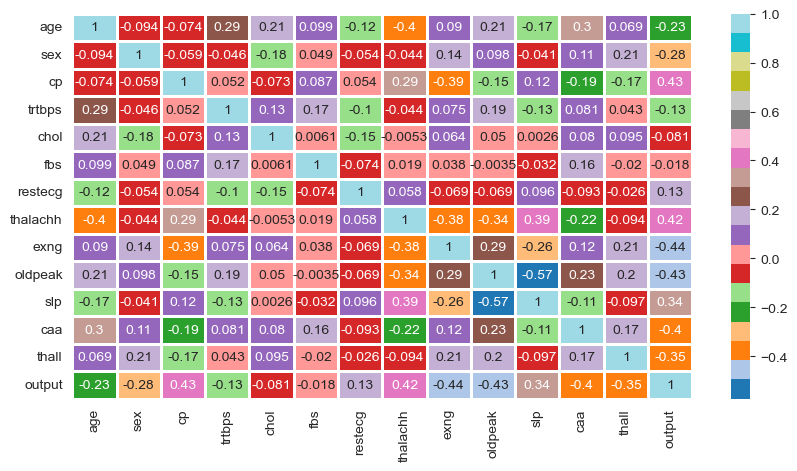

In [284]:
plt.figure(figsize=[10,5])
sns.heatmap(df.corr(),annot=True,cbar=True,linewidth=1,linecolor="White",cmap="tab20")

In [ ]:
Performed EDA by using Pandas Profiling:

In [277]:
profile=df.profile_report()
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [278]:
profile.to_file("Heart Disease Diagnostic Analysis profile report.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
#exporting final dataset to as csv file for dashboarding in power BI
df.to_csv("Cheart.csv",index=False)